In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
headers = ['userid','productid', 'rating','timestamp']

In [151]:
data = pd.read_csv('/Volumes/FastSSD/Anaconda/anaconda3/project/ratings_Electronics.csv',header=None)

In [152]:
data.shape

(7824482, 4)

In [153]:
data.columns= headers

In [155]:
data.head()

,userid,productid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [156]:
data.isnull().sum()

userid       0
productid    0
rating       0
timestamp    0
dtype: int64

In [157]:
data.isna().sum()

userid       0
productid    0
rating       0
timestamp    0
dtype: int64

In [158]:
print ('Unique users')
print (data['userid'].value_counts().count())

Unique users
4201696


In [159]:
data[data['userid'].isin(counts1[counts1 >= 50].index)]

,userid,productid,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600


In [160]:
print ('Unique products')
print (data['productid'].value_counts().count())

Unique products
476002


In [161]:
counts1 = data['userid'].value_counts()
# print(counts1)
data_ratingabove50 = data[data['userid'].isin(counts1[counts1 >= 50].index)]

In [162]:
data_ratingabove50.shape

(125871, 4)

In [163]:
print ('Unique users')
print (data_ratingabove50['userid'].value_counts().count())

Unique users
1540


In [164]:
print ('Unique products')
print (data_ratingabove50['productid'].value_counts().count())

Unique products
48190


In [165]:
from sklearn.model_selection import train_test_split

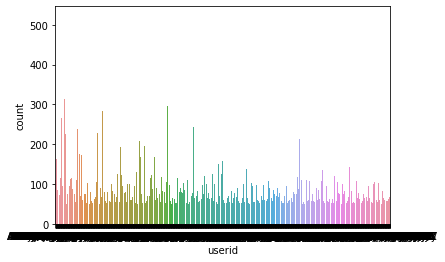

In [167]:
sns.countplot(data_ratingabove50.userid.astype(str))

In [168]:
train_data, test_data = train_test_split(data_ratingabove50, test_size = 0.30, random_state=0)
print(train_data.head(5))
print('Train data shape: %d\n'+ str(train_data.shape))
print('Test data shape: %d\n' + str(test_data.shape))

                 userid   productid  rating   timestamp
6595853  A2BYV7S1QP2YIG  B009EAHVTA     5.0  1399161600
4738241   AB094YABX21WQ  B0056XCEAA     1.0  1315267200
4175596  A3D0UM4ZD2CMAW  B004I763AW     5.0  1355616000
3753016   AATWFX0ZZSE6C  B0040NPHMO     3.0  1293753600
1734767  A1NNMOD9H36Q8E  B0015VW3BM     4.0  1220313600
Train data shape: %d
(88109, 4)
Test data shape: %d
(37762, 4)


In [169]:
train_data.head()

,userid,productid,rating,timestamp
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0,1399161600
4738241,AB094YABX21WQ,B0056XCEAA,1.0,1315267200
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0,1355616000
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0,1293753600
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0,1220313600


### Popularity based model

In [170]:
data_ratingabove50 = train_data.groupby('rating').agg({'rating':'count'})
data_ratingabove50.rename(columns = {'rating': 'No.of Values'},inplace=True)
data_ratingabove50

,No.of Values
rating,
1.0,3617
2.0,3759
3.0,8445
4.0,22574
5.0,49714


In [171]:
data_ratingabove50 = train_data.groupby('productid').agg({'productid':'count'})
data_ratingabove50.rename(columns = {'productid': 'score'},inplace=True)

In [172]:
data_ratingabove50['score']>50

productid
0594451647    False
0594481813    False
0970407998    False
0972683275    False
1400501466    False
              ...  
B00LA6T0LS    False
B00LBZ1Z7K    False
B00LED02VY    False
B00LGQ6HL8    False
B00LI4ZZO8    False
Name: score, Length: 38226, dtype: bool

In [173]:
data_ratingabove50=data_ratingabove50.sort_values(['score','productid'] ,ascending=False)

In [174]:
data_ratingabove50['Rank']= data_ratingabove50.rank(ascending=False,method='first')

In [175]:
data_ratingabove50=data_ratingabove50.head(5)
data_ratingabove50

,score,Rank
productid,,
B0088CJT4U,133,1.0
B007WTAJTO,124,2.0
B003ES5ZUU,122,3.0
B000N99BBC,114,4.0
B00829TIEK,97,5.0


In [176]:
data_ratingabove50

,score,Rank
productid,,
B0088CJT4U,133,1.0
B007WTAJTO,124,2.0
B003ES5ZUU,122,3.0
B000N99BBC,114,4.0
B00829TIEK,97,5.0


In [177]:
def recommend(userid):
    user_recommendations = data_ratingabove50 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 

    return user_recommendations

In [178]:
for i in test_data.userid[1:5]:
    print (recommend(i))

            Rank  score
productid              
B0088CJT4U   1.0    133
B007WTAJTO   2.0    124
B003ES5ZUU   3.0    122
B000N99BBC   4.0    114
B00829TIEK   5.0     97
            Rank  score
productid              
B0088CJT4U   1.0    133
B007WTAJTO   2.0    124
B003ES5ZUU   3.0    122
B000N99BBC   4.0    114
B00829TIEK   5.0     97
            Rank  score
productid              
B0088CJT4U   1.0    133
B007WTAJTO   2.0    124
B003ES5ZUU   3.0    122
B000N99BBC   4.0    114
B00829TIEK   5.0     97
            Rank  score
productid              
B0088CJT4U   1.0    133
B007WTAJTO   2.0    124
B003ES5ZUU   3.0    122
B000N99BBC   4.0    114
B00829TIEK   5.0     97


### Collaborative Filtering model

In [179]:
productrating = train_data.pivot_table(index=['userid'],columns=['productid'],values='rating')

In [180]:
productrating.tail()

productid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501776,1400532620,1400532655,1400599997,1400698987,...,B00L26YDA4,B00L3YHF6O,B00L403O94,B00L5YZCCG,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGQ6HL8,B00LI4ZZO8
userid,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZCE11PSTCH1L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZMY6E8B52L2T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZNUHQSHZHSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZOK5STV85FBJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
le = LabelEncoder()

train_data['userid'] = le.fit_transform(train_data.userid)

In [183]:
oldproduct = productrating['B000N99BBC']
oldproduct.head(10)

userid
A100UD67AHFODS    NaN
A100WO06OQR8BQ    NaN
A105S56ODHGJEK    5.0
A105TOJ6LTVMBG    NaN
A10AFVU66A79Y1    NaN
A10H24TDLK2VDP    5.0
A10NMELR4KX0J6    NaN
A10O7THJ2O20AG    NaN
A10PEXB6XAQ5XF    NaN
A10X9ME6R66JDX    NaN
Name: B000N99BBC, dtype: float64

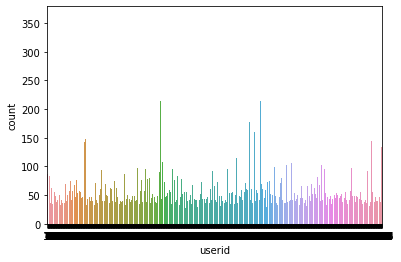

In [184]:
sns.countplot(train_data.userid)

In [185]:
ratings_matrix = train_data.pivot(index='userid', columns='productid', values='rating').fillna(0)
userid = ratings_matrix.index
productid = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(1540, 38226)


productid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501776,1400532620,1400532655,1400599997,1400698987,...,B00L26YDA4,B00L3YHF6O,B00L403O94,B00L5YZCCG,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGQ6HL8,B00LI4ZZO8
userid,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 5)

In [205]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [206]:
preds_df.head()

productid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501776,1400532620,1400532655,1400599997,1400698987,...,B00L26YDA4,B00L3YHF6O,B00L403O94,B00L5YZCCG,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGQ6HL8,B00LI4ZZO8
0,0.003027,0.002937,0.000641,0.012268,0.002137,0.001836,0.000503,0.013480,0.000606,0.001854,...,0.158514,0.077464,-0.001693,0.000652,0.038832,0.058448,0.001808,0.005893,0.077342,0.009407
1,0.002224,0.002459,0.000576,0.013255,0.006043,0.009243,0.001606,0.011156,0.007244,0.003750,...,0.031990,0.058171,0.005553,0.000563,0.018950,0.006227,0.005344,0.000229,0.004020,0.003645
2,-0.000976,-0.000860,-0.000155,0.012917,0.007390,0.008681,0.003809,-0.006691,0.009422,0.001734,...,-0.002275,0.060152,0.020428,-0.000224,0.011018,-0.019343,0.020473,-0.001763,-0.010465,0.007266
3,0.001821,0.001789,0.000417,0.004627,0.001620,0.003256,-0.000146,0.009546,0.001648,0.001799,...,0.009501,0.014302,-0.003098,0.000421,0.005344,0.005092,-0.002961,0.000195,0.001783,-0.000567
4,0.000780,0.000754,0.000189,0.006852,0.003139,0.004183,0.001155,0.003208,0.003724,0.001516,...,0.006094,0.027294,0.004811,0.000169,0.006653,-0.002668,0.004984,-0.000350,-0.000818,0.001899


In [207]:
user_id = 2

In [208]:
userID = ratings_matrix.iloc[user_id-1, :].name
userID

1

In [209]:
preds_df.shape

(1540, 38226)

In [210]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)

In [211]:
len(sorted_user_predictions)

38226

In [212]:
user_data = train_data[train_data.userid == (userID)]

In [213]:
user_data

,userid,productid,rating,timestamp
2456615,1,B00272MT3U,5.0,1272240000
6984544,1,B00AYB3OMG,5.0,1370217600
3128260,1,B0037UD14C,5.0,1271635200
453603,1,B0002CPBWI,5.0,1271635200
3817420,1,B0042FZ50O,2.0,1312416000
...,...,...,...,...
7820269,1,B00K91DB7Y,1.0,1403827200
1113601,1,B000KI81XK,5.0,1285804800
2849224,1,B002TLT10I,1.0,1395187200
315779,1,B0000AE6G9,5.0,1264550400


In [214]:
recommendations = (pd.DataFrame(sorted_user_predictions).reset_index()).rename(columns = {user_id: 'Predictions'})

In [215]:
recommendations

,productid,Predictions
0,B0088CJT4U,1.369661
1,B00829TIEK,1.110279
2,B000N99BBC,1.101962
3,B008DWCRQW,0.991142
4,B004CLYEDC,0.952880
...,...,...
38221,B005HMKKH4,-0.104913
38222,B004G6002M,-0.108505
38223,B001XURP7W,-0.111703
38224,B005FYNSPK,-0.186182


In [217]:
recommendations.sort_values('Predictions', ascending = False).iloc[:10, :]

,productid,Predictions
0,B0088CJT4U,1.369661
1,B00829TIEK,1.110279
2,B000N99BBC,1.101962
3,B008DWCRQW,0.991142
4,B004CLYEDC,0.952880
5,B004CLYEFK,0.907012
6,B0079UAT0A,0.830656
7,B00829THK0,0.825023
8,B002R5AM7C,0.802092
9,B0034CL2ZI,0.737105
